In [1]:
# Ahora que hemos la preparacion de los datos, en este archivo trabajaremos con ellos

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Cargar datos
df = pd.read_pickle("tabla_final_limpia.pkl")

# ya está de cierta forma recogida por variables como visitas web mes o similares

In [4]:
# Vamos a crear una columna que muestre el tiempo que lleva un cliente en el banco

# Asegurarse de que las fechas estén en formato datetime
df['fecha_intereaccion'] = pd.to_datetime(df['fecha_intereaccion'], errors='coerce')
df['fecha_inicio_cliente'] = pd.to_datetime(df['fecha_inicio_cliente'], errors='coerce')

# Crear nueva columna de tiempo que lleva como cliente (en días)
df['tiempo_cliente_dias'] = (df['fecha_intereaccion'] - df['fecha_inicio_cliente']).dt.days


In [5]:
pd.set_option('display.max_columns', None)
df.head(5)

,edad,incumplimiento_pagos,tiene_hipoteca,tiene_prestamo,duracion_ultima_llamada,contacos_con_cliente,dias_desde_ultimo_contacto,contactos_pre_campaña,tasa_variacion_empleo,IPC,respuesta_campaña,fecha_intereaccion,ingresos,hijos_pequeños,hijos_adolescentes,fecha_inicio_cliente,visitas_web_mes,total_hijos,nivel_educativo,estado_civil,tiempo_cliente_dias
id,,,,,,,,,,,,,,,,,,,,,
089b39d8-e4d0-461b-87d4-814d71e0e079,<NA>,0,0,0,261,1,999,0,1.1,93.994,no,2019-08-02,161770,1,0,2012-04-04,29,1,Primaria,Casado,2676.0
e9d37224-cb6f-4942-98d7-46672963d097,57,<NA>,0,0,149,1,999,0,1.1,93.994,no,2016-09-14,85477,1,1,2012-12-30,7,2,Instituto,Casado,1354.0
3f9f49b5-e410-4948-bf6e-f9244f04918b,37,0,1,0,226,1,999,0,1.1,93.994,no,2019-02-15,147233,1,1,2012-02-02,5,2,Instituto,Casado,2570.0
9991fafb-4447-451a-8be2-b0df6098d13e,40,0,0,0,151,1,999,0,1.1,93.994,no,2015-11-29,121393,1,2,2012-12-21,29,3,Primaria,Casado,1073.0
eca60b76-70b6-4077-80ba-bc52e8ebb0eb,56,0,0,1,307,1,999,0,1.1,93.994,no,2017-01-29,63164,1,2,2012-06-20,20,3,Instituto,Casado,1684.0


In [6]:
df.shape

(32527, 21)

In [7]:
# Veo mis columnas para no tener errores
for col in df.columns:
    print(f"'{col}'")

'edad'
'incumplimiento_pagos'
'tiene_hipoteca'
'tiene_prestamo'
'duracion_ultima_llamada'
'contacos_con_cliente'
'dias_desde_ultimo_contacto'
'contactos_pre_campaña'
'tasa_variacion_empleo'
'IPC'
'respuesta_campaña'
'fecha_intereaccion'
'ingresos'
'hijos_pequeños'
'hijos_adolescentes'
'fecha_inicio_cliente'
'visitas_web_mes'
'total_hijos'
'nivel_educativo'
'estado_civil'
'tiempo_cliente_dias'


In [8]:
# Vamos a ver las caracteristicas demográficas y socioeconómicas de nuestros datos en promedio. Cuantitativas

# Lista de columnas
columnas = ['edad', 'IPC', 'ingresos', 'hijos_pequeños', 'hijos_adolescentes', 'total_hijos', 'tasa_variacion_empleo']

estadisticos_descriptivos = []

# Calcular medias
for var in columnas:
    media = df[var].mean()
    mediana = df[var].median()
    moda = df[var].mode().iloc[0] if not df[var].mode().empty else None
    
    estadisticos_descriptivos.append({
        'Variable': var,
        'Media': media,
        'Mediana': mediana,
        'Moda': moda
})

# Crear DataFrame con el resumen
df_resumen_numericas = pd.DataFrame(estadisticos_descriptivos)
df_resumen_numericas


,Variable,Media,Mediana,Moda
0,edad,39.713573,38.000,31.000
1,IPC,93.695645,93.918,93.994
2,ingresos,93071.656809,92973.500,70422.000
3,hijos_pequeños,1.004646,1.000,2.000
4,hijos_adolescentes,0.999550,1.000,1.000
5,total_hijos,2.004196,2.000,2.000
6,tasa_variacion_empleo,0.379559,1.100,1.400


In [9]:
# Vamos a ver las caracteristicas demográficas y socioeconómicas de nuestros datos en promedio. Cualitativas.

# Conteo de valores únicos para cada variable categórica
conteos = {
    'Nivel educativo': df['nivel_educativo'].value_counts(dropna=False),
    'estado_civil': df['estado_civil'].value_counts(dropna=False)
}

# Convertir a DataFrames separados si lo prefieres
df_nivel_educativo = conteos['Nivel educativo'].reset_index()
df_nivel_educativo.columns = ['Nivel educativo', 'Frecuencia']

df_estado_civil = conteos['estado_civil'].reset_index()
df_estado_civil.columns = ['Estado civil', 'Frecuencia']

# Para poder verlo en una sola tabla: 

# Renombrar y preparar ambas tablas
df_nivel_educativo.columns = ['Categoría', 'Frecuencia']
df_nivel_educativo['Variable'] = 'Nivel educativo'

df_estado_civil.columns = ['Categoría', 'Frecuencia']
df_estado_civil['Variable'] = 'Estado civil'

# Concatenar ambas tablas en una sola
df_categorias_apilado = pd.concat([df_nivel_educativo, df_estado_civil], ignore_index=True)

# Mostrar resultado
print(df_categorias_apilado)


               Categoría  Frecuencia         Variable
0               Primaria       10078  Nivel educativo
1    Grado Universitario        9512  Nivel educativo
2              Instituto        7783  Nivel educativo
3  Formación profesional        4184  Nivel educativo
4                    NaN         970  Nivel educativo
5                 Casado       19652     Estado civil
6                Soltero        9109     Estado civil
7             Divorciado        3733     Estado civil
8                    NaN          33     Estado civil


In [10]:
# Lista de variables binarias
variables_binarias = ['tiene_hipoteca', 'incumplimiento_pagos', 'tiene_prestamo']

# Lista para acumular DataFrames individuales
lista_df = []

# Recorrer variables, contar valores y formatear
for var in variables_binarias:
    temp = df[var].value_counts(dropna=False).reset_index()
    temp.columns = ['Categoría', 'Frecuencia']
    temp['Variable'] = var
    lista_df.append(temp)

# Concatenar todo en un único DataFrame
df_binarias_apilado = pd.concat(lista_df, ignore_index=True)

# Mostrar resultado
print(df_binarias_apilado)


   Categoría  Frecuencia              Variable
0          1       16874        tiene_hipoteca
1          0       15132        tiene_hipoteca
2       <NA>         521        tiene_hipoteca
3          0       26665  incumplimiento_pagos
4       <NA>        5860  incumplimiento_pagos
5          1           2  incumplimiento_pagos
6          0       27027        tiene_prestamo
7          1        4979        tiene_prestamo
8       <NA>         521        tiene_prestamo


In [11]:
# Vamos a filtrar para ver cómo son los datos de los clientes más fieles. 
# Antes de eso, vamos a observar los datos

# Estadísticas básicas
descripcion = df['tiempo_cliente_dias'].describe()
print("Estadísticas descriptivas:")
print(descripcion)

# Moda
moda = df['tiempo_cliente_dias'].mode().iloc[0]
print("\nModa:", moda)

# Mediana
mediana = df['tiempo_cliente_dias'].median()
print("Mediana:", mediana)

# Desviación estándar
std = df['tiempo_cliente_dias'].std()
print("Desviación estándar:", std)


Estadísticas descriptivas:
count    19909.000000
mean      1832.157919
std        538.636218
min        739.000000
25%       1376.000000
50%       1833.000000
75%       2290.000000
max       2921.000000
Name: tiempo_cliente_dias, dtype: float64

Moda: 1509.0
Mediana: 1833.0
Desviación estándar: 538.6362179257998


In [12]:
# vamos a ver un df con los 100 clientes más fieles

# Ordenar por mayor tiempo como cliente
df_ordenado = df.sort_values(by='tiempo_cliente_dias', ascending=False)

# Seleccionar los 1000 primeros
df_1000_mas_antiguos = df_ordenado.head(1000)
df_1000_mas_antiguos.head()


,edad,incumplimiento_pagos,tiene_hipoteca,tiene_prestamo,duracion_ultima_llamada,contacos_con_cliente,dias_desde_ultimo_contacto,contactos_pre_campaña,tasa_variacion_empleo,IPC,respuesta_campaña,fecha_intereaccion,ingresos,hijos_pequeños,hijos_adolescentes,fecha_inicio_cliente,visitas_web_mes,total_hijos,nivel_educativo,estado_civil,tiempo_cliente_dias
id,,,,,,,,,,,,,,,,,,,,,
f448652e-0753-4a68-b87d-64994fb93ae2,39,<NA>,0,0,21,8,999,0,1.4,94.465,no,2019-12-31,76106,2,0,2012-01-01,31,2,Grado Universitario,Casado,2921.0
c98a9ff3-3234-4c96-b639-a7e1c381465f,30,<NA>,1,0,483,1,999,0,1.4,94.465,no,2019-12-23,37096,1,1,2012-01-02,12,2,Instituto,Soltero,2912.0
7448ab04-2e04-47a3-b1dc-aaeddb7fb05c,38,0,1,0,51,18,999,0,1.4,93.918,no,2019-12-29,23969,1,1,2012-01-12,19,2,Instituto,Casado,2908.0
d54541c8-bc3b-4234-901d-05b8c9cf4b6e,22,0,1,0,195,1,999,0,1.1,93.994,no,2019-12-28,133129,0,1,2012-01-12,16,1,Primaria,Soltero,2907.0
e205dd4c-e2a4-4767-a0fb-2f01603a34cc,31,0,1,1,782,1,999,0,1.4,93.918,yes,2019-12-22,135027,2,2,2012-01-06,18,4,Primaria,Casado,2907.0


In [13]:
import pandas as pd

# Asegúrate de que ambos DataFrames ya existen:
# df (todos los clientes)
# df_1000_mas_antiguos (subset de 1000 clientes más antiguos)

# Añadir etiquetas de grupo
df['grupo'] = 'Todos los clientes'
df_1000_mas_antiguos['grupo'] = 'Top 1000 antiguos'

# Unir ambos en uno solo
df_comparado = pd.concat([df, df_1000_mas_antiguos], ignore_index=True)

# Variables numéricas que quieres analizar
variables = ['edad', 'ingresos', 'visitas_web_mes', 'tiempo_cliente_dias']

# Lista para guardar resultados
estadisticas = []

# Calcular media, mediana y moda por grupo y variable
for var in variables:
    for grupo, datos in df_comparado.groupby('grupo'):
        media = datos[var].mean()
        mediana = datos[var].median()
        moda = datos[var].mode().iloc[0] if not datos[var].mode().empty else None

        estadisticas.append({
            'Variable': var,
            'Grupo': grupo,
            'Media': media,
            'Mediana': mediana,
            'Moda': moda
        })

# Crear el DataFrame de resumen
df_estadisticas = pd.DataFrame(estadisticas)

# Mostrar resultado
print(df_estadisticas)


              Variable               Grupo         Media  Mediana     Moda
0                 edad  Todos los clientes     39.713573     38.0     31.0
1                 edad   Top 1000 antiguos     39.273637     38.0     38.0
2             ingresos  Todos los clientes  93071.656809  92973.5  70422.0
3             ingresos   Top 1000 antiguos  92723.268000  91061.0  10561.0
4      visitas_web_mes  Todos los clientes     16.537616     16.0     12.0
5      visitas_web_mes   Top 1000 antiguos     16.431000     16.0      4.0
6  tiempo_cliente_dias  Todos los clientes   1832.157919   1833.0   1509.0
7  tiempo_cliente_dias   Top 1000 antiguos   2749.185000   2741.0   2750.0


C:\Users\david\AppData\Local\Temp\ipykernel_28668\452502772.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1000_mas_antiguos['grupo'] = 'Top 1000 antiguos'


In [14]:
# Partimos de df_estadisticas creado previamente

# Separar los dos grupos
df_todos = df_estadisticas[df_estadisticas['Grupo'] == 'Todos los clientes'].set_index('Variable')
df_top = df_estadisticas[df_estadisticas['Grupo'] == 'Top 1000 antiguos'].set_index('Variable')

# Calcular diferencia: Top 1000 - Todos
df_diferencias = df_top[['Media', 'Mediana', 'Moda']] - df_todos[['Media', 'Mediana', 'Moda']]

# Renombrar columnas para dejar claro qué representan
df_diferencias.columns = ['Diferencia Media', 'Diferencia Mediana', 'Diferencia Moda']

# Mostrar tabla final
print(df_diferencias.reset_index())


              Variable  Diferencia Media  Diferencia Mediana  Diferencia Moda
0                 edad         -0.439936                 0.0              7.0
1             ingresos       -348.388809             -1912.5         -59861.0
2      visitas_web_mes         -0.106616                 0.0             -8.0
3  tiempo_cliente_dias        917.027081               908.0           1241.0


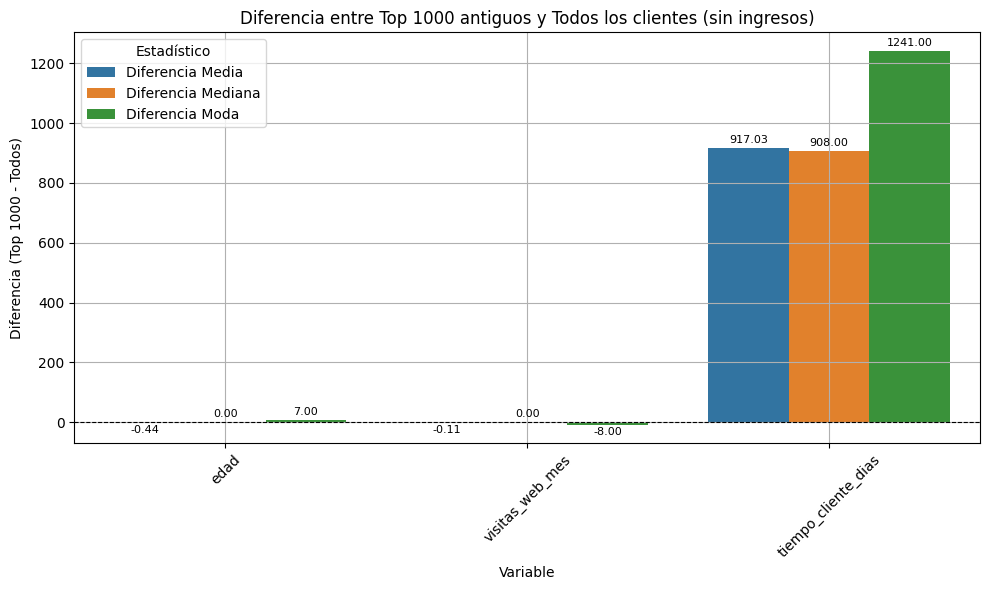

In [15]:
# Filtrar para excluir 'ingresos'
df_dif_sin_ingresos = df_diferencias.drop(index='ingresos').reset_index()

# Reorganizar para formato largo (melt)
df_plot = df_dif_sin_ingresos.melt(id_vars='Variable',
                                   value_vars=['Diferencia Media', 'Diferencia Mediana', 'Diferencia Moda'],
                                   var_name='Estadístico',
                                   value_name='Diferencia')

# Crear gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_plot, x='Variable', y='Diferencia', hue='Estadístico')

# Añadir etiquetas con los valores encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, padding=2)

# Estética
plt.title("Diferencia entre Top 1000 antiguos y Todos los clientes (sin ingresos)")
plt.ylabel("Diferencia (Top 1000 - Todos)")
plt.xlabel("Variable")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend(title='Estadístico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


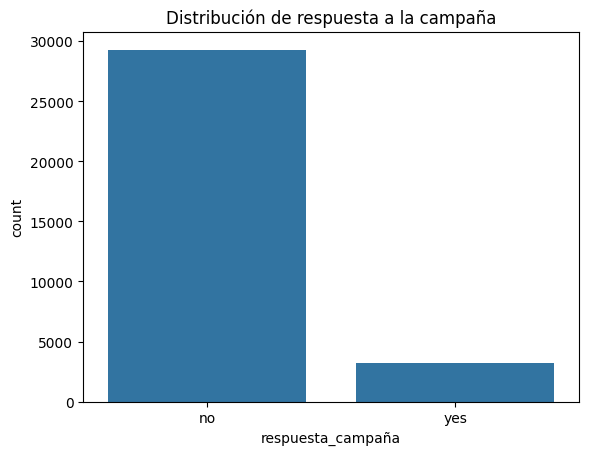

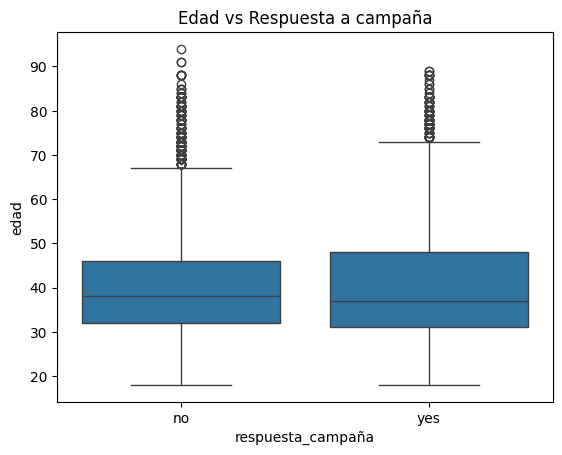

In [16]:
# Distribución respuesta campaña
sns.countplot(x='respuesta_campaña', data=df)
plt.title("Distribución de respuesta a la campaña")
plt.show()

# Boxplot de edad por respuesta
sns.boxplot(x='respuesta_campaña', y='edad', data=df)
plt.title("Edad vs Respuesta a campaña")
plt.show()


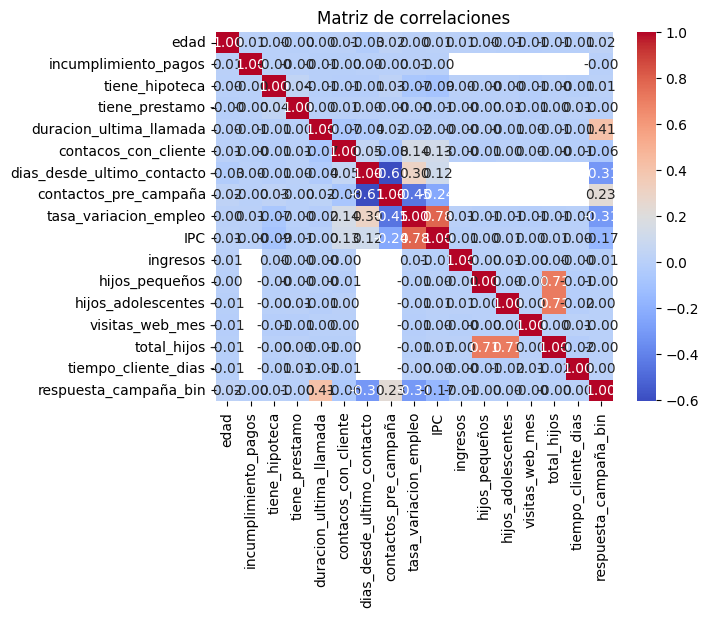

In [17]:
# CORRELACIÓN VARIABLES NUMÉRICAS

# Convertir respuesta a binaria
df['respuesta_campaña_bin'] = df['respuesta_campaña'].map({'yes': 1, 'no': 0})

# Correlación entre numéricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlaciones = df[num_cols].corr()

# Visualizar correlación
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlaciones")
plt.show()


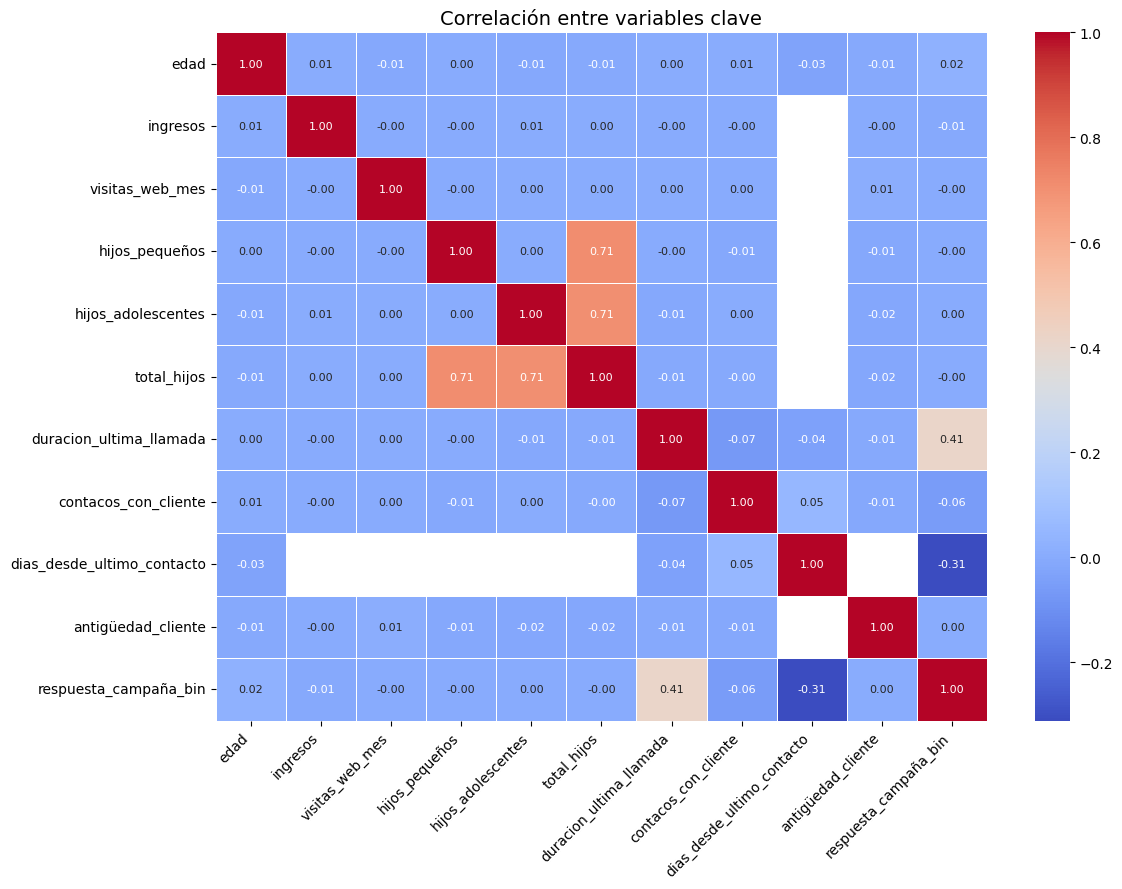

In [18]:
# Crear columna de antigüedad si no existe
df['fecha_intereaccion'] = pd.to_datetime(df['fecha_intereaccion'], errors='coerce')
df['fecha_inicio_cliente'] = pd.to_datetime(df['fecha_inicio_cliente'], errors='coerce')
df['antigüedad_cliente'] = (df['fecha_intereaccion'] - df['fecha_inicio_cliente']).dt.days

# Asegurar variable binaria
df['respuesta_campaña_bin'] = df['respuesta_campaña'].map({'yes': 1, 'no': 0})

# Selección de columnas clave para correlación
columnas_clave = [
    'edad', 'ingresos', 'visitas_web_mes',
    'hijos_pequeños', 'hijos_adolescentes', 'total_hijos',
    'duracion_ultima_llamada', 'contacos_con_cliente',
    'dias_desde_ultimo_contacto', 'antigüedad_cliente',
    'respuesta_campaña_bin'
]

# Crear matriz de correlación solo con esas columnas
df_corr = df[columnas_clave].copy()
corr_matrix = df_corr.corr()

# Graficar
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5,
            annot_kws={"size": 8})
plt.title("Correlación entre variables clave", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Vemos que la correlación se concentra únicamente en variables que dependen directamente unas de otras
# Es una correlación menos a 0.5, pero vemos cierta relación entre los impactos de la última campaña y la duración de llamadas y campaña actual


In [19]:
# Convertir fechas
df['fecha_intereaccion'] = pd.to_datetime(df['fecha_intereaccion'])
df['fecha_inicio_cliente'] = pd.to_datetime(df['fecha_inicio_cliente'])

# Antigüedad cliente en días
df['antigüedad_cliente'] = (df['fecha_intereaccion'] - df['fecha_inicio_cliente']).dt.days


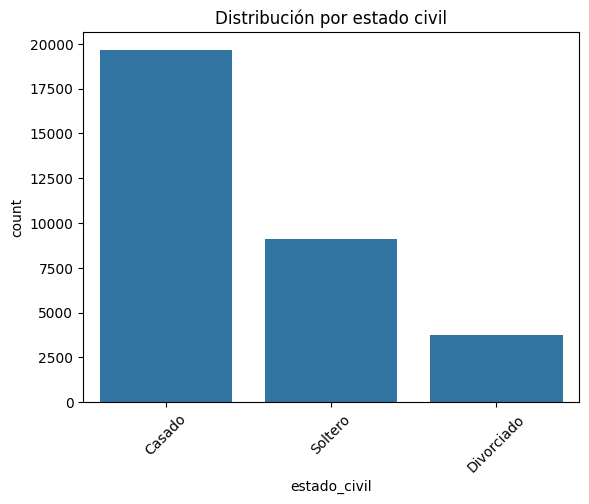

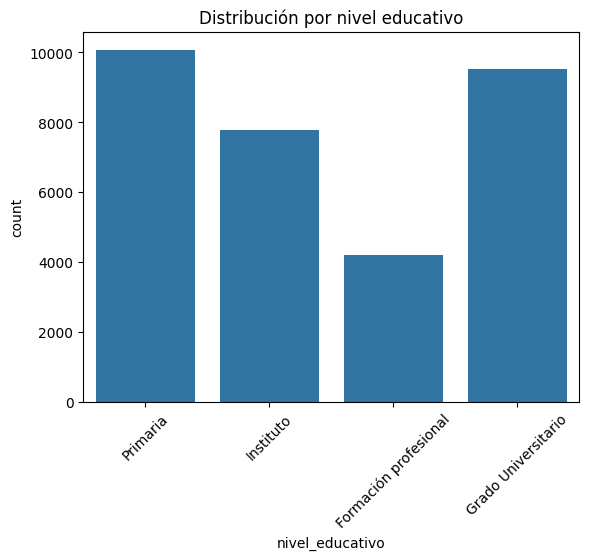

In [20]:
# DISTRIBUCIÓN VARIABLES CATEGÓRICAS 

# Estado civil
sns.countplot(x='estado_civil', data=df)
plt.title("Distribución por estado civil")
plt.xticks(rotation=45)
plt.show()

# Nivel educativo
sns.countplot(x='nivel_educativo', data=df)
plt.title("Distribución por nivel educativo")
plt.xticks(rotation=45)
plt.show()


In [21]:
# Ahora lo haremos viendo el top1000 en funcion de los ingresos
df_1000_mayor_ingreso = df.sort_values(by='ingresos', ascending=False).dropna(subset=['ingresos']).head(1000).copy()

# Etiquetas de grupo
df['grupo'] = 'Todos los clientes'
df_1000_mayor_ingreso['grupo'] = 'Top 1000 ingresos'

# Unir ambos DataFrames
df_comparado_ingresos = pd.concat([df, df_1000_mayor_ingreso], ignore_index=True)

# Variables a comparar
variables = ['edad', 'ingresos', 'visitas_web_mes', 'tiempo_cliente_dias']

# Calcular estadísticos
estadisticas_ingresos = []
for var in variables:
    for grupo, datos in df_comparado_ingresos.groupby('grupo'):
        media = datos[var].mean()
        mediana = datos[var].median()
        moda = datos[var].mode().iloc[0] if not datos[var].mode().empty else None
        estadisticas_ingresos.append({
            'Variable': var,
            'Grupo': grupo,
            'Media': media,
            'Mediana': mediana,
            'Moda': moda
        })

df_estadisticas_ingresos = pd.DataFrame(estadisticas_ingresos)
df_estadisticas_ingresos


,Variable,Grupo,Media,Mediana,Moda
0,edad,Todos los clientes,39.713573,38.0,31.0
1,edad,Top 1000 ingresos,39.990022,39.0,39.0
2,ingresos,Todos los clientes,93071.656809,92973.5,70422.0
3,ingresos,Top 1000 ingresos,176434.612000,176391.0,172266.0
4,visitas_web_mes,Todos los clientes,16.537616,16.0,12.0
5,visitas_web_mes,Top 1000 ingresos,16.872000,17.0,6.0
6,tiempo_cliente_dias,Todos los clientes,1832.157919,1833.0,1509.0
7,tiempo_cliente_dias,Top 1000 ingresos,1843.137235,1855.0,2227.0


In [22]:
# Calculamos las diferencias

# Separar los dos grupos
df_total = df_estadisticas_ingresos[df_estadisticas_ingresos['Grupo'] == 'Todos los clientes'].set_index('Variable')
df_top_ingresos = df_estadisticas_ingresos[df_estadisticas_ingresos['Grupo'] == 'Top 1000 ingresos'].set_index('Variable')

# Calcular diferencias
df_diferencias_ingresos = df_top_ingresos[['Media', 'Mediana', 'Moda']] - df_total[['Media', 'Mediana', 'Moda']]
df_diferencias_ingresos.columns = ['Diferencia Media', 'Diferencia Mediana', 'Diferencia Moda']

df_diferencias_ingresos

,Diferencia Media,Diferencia Mediana,Diferencia Moda
Variable,,,
edad,0.276449,1.0,8.0
ingresos,83362.955191,83417.5,101844.0
visitas_web_mes,0.334384,1.0,-6.0
tiempo_cliente_dias,10.979317,22.0,718.0


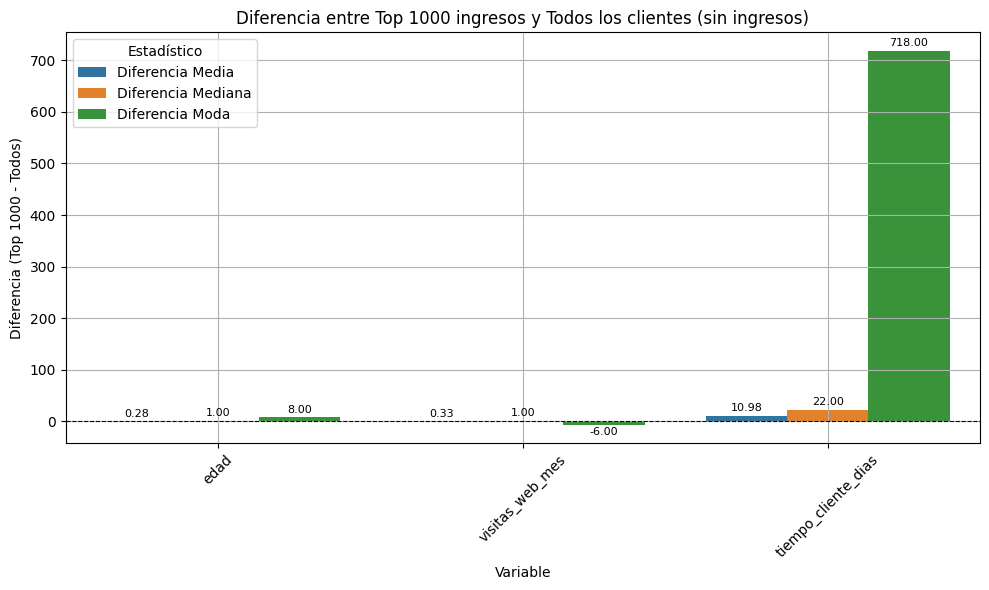

In [23]:
# Filtrar para excluir 'ingresos'
df_dif_sin_ingresos = df_diferencias_ingresos.drop(index='ingresos').reset_index()

# Reorganizar para formato largo (melt)
df_plot = df_dif_sin_ingresos.melt(id_vars='Variable',
                                   value_vars=['Diferencia Media', 'Diferencia Mediana', 'Diferencia Moda'],
                                   var_name='Estadístico',
                                   value_name='Diferencia')

# Crear gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_plot, x='Variable', y='Diferencia', hue='Estadístico')

# Añadir etiquetas encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, padding=2)

# Estética
plt.title("Diferencia entre Top 1000 ingresos y Todos los clientes (sin ingresos)")
plt.ylabel("Diferencia (Top 1000 - Todos)")
plt.xlabel("Variable")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend(title='Estadístico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()



In [24]:
# Ahora en función del nivel educativo de los clientes

# Asegúrate de que 'nivel_educativo' no tenga nulos (los quitamos para análisis comparativo)
df_grado = df[df['nivel_educativo'] == 'Grado Universitario'].copy()

# Etiquetas de grupo
df['grupo'] = 'Todos los clientes'
df_grado['grupo'] = 'Grado Universitario'

# Unir ambos DataFrames
df_comparado_educacion = pd.concat([df, df_grado], ignore_index=True)

# Variables numéricas a comparar
variables = ['edad', 'ingresos', 'visitas_web_mes', 'tiempo_cliente_dias']

# Lista para almacenar estadísticas
estadisticas_educacion  = []

# Calcular media, mediana y moda por nivel educativo
for var in variables:
    for grupo, datos in df_comparado_educacion.groupby('grupo'):
        media = datos[var].mean()
        mediana = datos[var].median()
        moda = datos[var].mode().iloc[0] if not datos[var].mode().empty else None
        estadisticas_educacion.append({
            'Variable': var,
            'Grupo': grupo,
            'Media': media,
            'Mediana': mediana,
            'Moda': moda
        })

# Crear DataFrame
df_estadisticas_educacion = pd.DataFrame(estadisticas_educacion)


In [25]:
# Separar por grupo
df_total = df_estadisticas_educacion[df_estadisticas_educacion['Grupo'] == 'Todos los clientes'].set_index('Variable')
df_grado_uni = df_estadisticas_educacion[df_estadisticas_educacion['Grupo'] == 'Grado Universitario'].set_index('Variable')

# Diferencias
df_diferencias_educacion = df_grado_uni[['Media', 'Mediana', 'Moda']] - df_total[['Media', 'Mediana', 'Moda']]
df_diferencias_educacion.columns = ['Diferencia Media', 'Diferencia Mediana', 'Diferencia Moda']



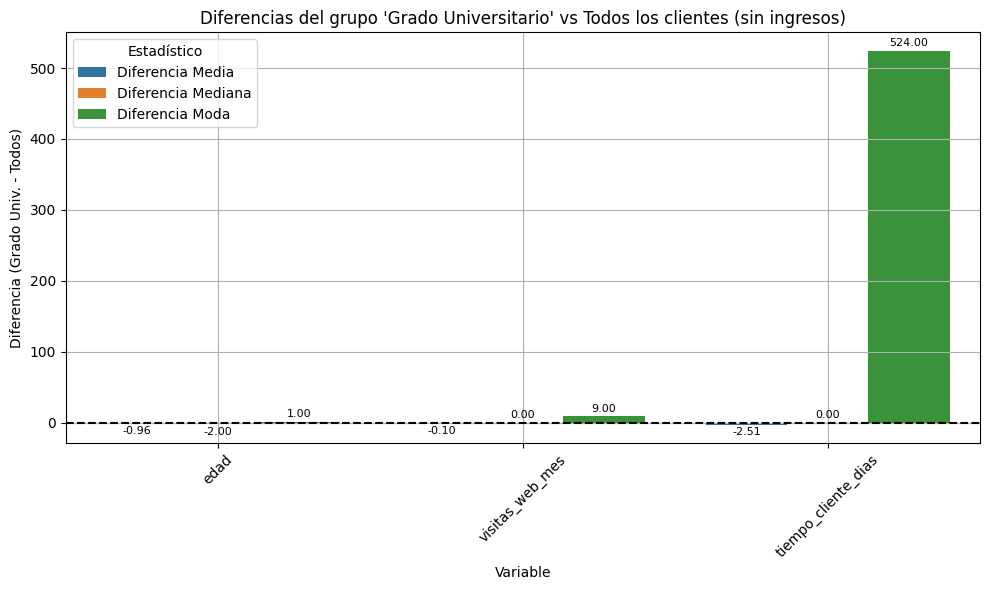

In [26]:
# Excluir ingresos (mucha diferencia en magnitudes)
df_plot = df_diferencias_educacion.drop(index='ingresos').reset_index().melt(
    id_vars='Variable',
    value_vars=['Diferencia Media', 'Diferencia Mediana', 'Diferencia Moda'],
    var_name='Estadístico',
    value_name='Diferencia'
)

# Gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_plot, x='Variable', y='Diferencia', hue='Estadístico')

# Ponemos cifra como etiquetas encima de las barras para que sea más fácil interpretar el gráfico
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, padding=2)

plt.title("Diferencias del grupo 'Grado Universitario' vs Todos los clientes (sin ingresos)")
plt.ylabel("Diferencia (Grado Univ. - Todos)")
plt.xlabel("Variable")
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


# He mantenido continuamente los tres estadísticos porque creo que es mejor que estén, pero si molestaran para la visualización, siempre podemos modificar
# "value_vars=['Media', 'Mediana', 'Moda']," y dejar únicamente 'Media'



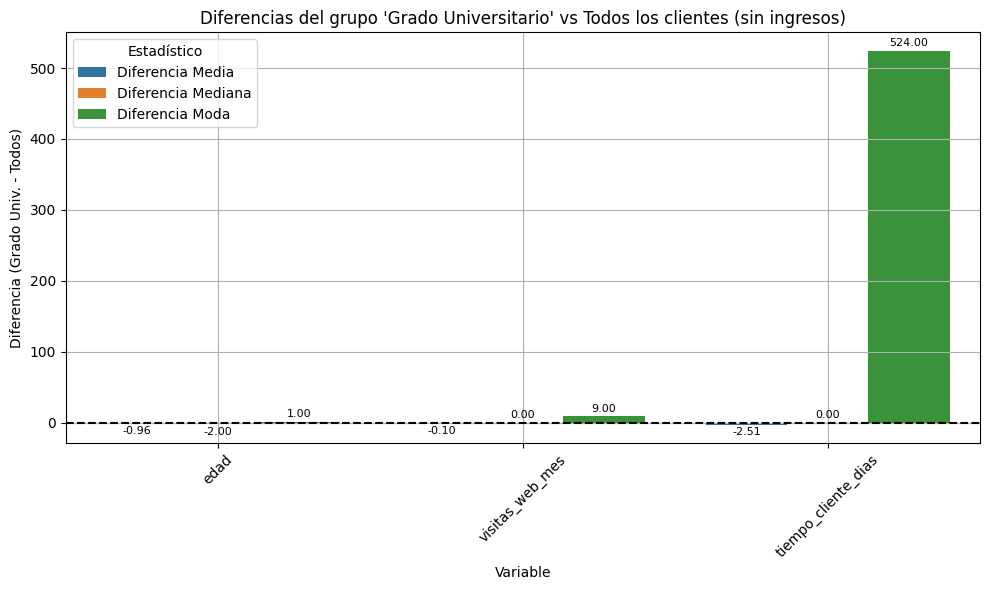

In [27]:
# Excluir ingresos
df_plot = df_diferencias_educacion.drop(index='ingresos').reset_index().melt(
    id_vars='Variable',
    value_vars=['Diferencia Media', 'Diferencia Mediana', 'Diferencia Moda'],
    var_name='Estadístico',
    value_name='Diferencia'
)

# Gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_plot, x='Variable', y='Diferencia', hue='Estadístico')

# Etiquetas encima
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, padding=2)

plt.title("Diferencias del grupo 'Grado Universitario' vs Todos los clientes (sin ingresos)")
plt.ylabel("Diferencia (Grado Univ. - Todos)")
plt.xlabel("Variable")
plt.axhline(0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


In [28]:
# Ahora la comparativa será en funcion del estado civil

# Eliminar nulos en estado_civil
df_estado = df.dropna(subset=['estado_civil']).copy()

# Variables numéricas que quieres comparar
variables = ['edad', 'ingresos', 'visitas_web_mes', 'tiempo_cliente_dias']

# Recorrer todos los valores únicos de estado_civil
for estado in df['estado_civil'].dropna().unique():
    df_estado = df[df['estado_civil'] == estado].copy()
    df_estado['grupo'] = estado
    df['grupo'] = 'Todos los clientes'

# Lista para almacenar estadísticas
estadisticas_estado = []

# Calcular media, mediana y moda por estado civil
for var in variables:
    for estado, datos in df_estado.groupby('estado_civil'):
        media = datos[var].mean()
        mediana = datos[var].median()
        moda = datos[var].mode().iloc[0] if not datos[var].mode().empty else None
        estadisticas_estado.append({
            'Variable': var,
            'Grupo': grupo,
            'Estado civil': estado,
            'Media': media,
            'Mediana': mediana,
            'Moda': moda
        })

# Crear DataFrame de estadísticas
df_estadisticas_estado = pd.DataFrame(estadisticas_estado)
df_total = df_estadisticas_estado[df_estadisticas_estado['Grupo'] == 'Todos los clientes'].set_index('Variable')
df_estado_sel = df_estadisticas_estado[df_estadisticas_estado['Grupo'] == estado].set_index('Variable')


In [29]:
# Separar por grupo
df_total = df_estadisticas_estado[df_estadisticas_estado['Grupo'] == 'Todos los clientes'].set_index('Variable')
df_estado = df_estadisticas_estado[df_estadisticas_estado['Grupo'] == 'Casado'].set_index('Variable')

# Diferencias
df_diferencias_estado = df_estado[['Media', 'Mediana', 'Moda']] - df_total[['Media', 'Mediana', 'Moda']]
df_diferencias_estado.columns = ['Diferencia Media', 'Diferencia Mediana', 'Diferencia Moda']


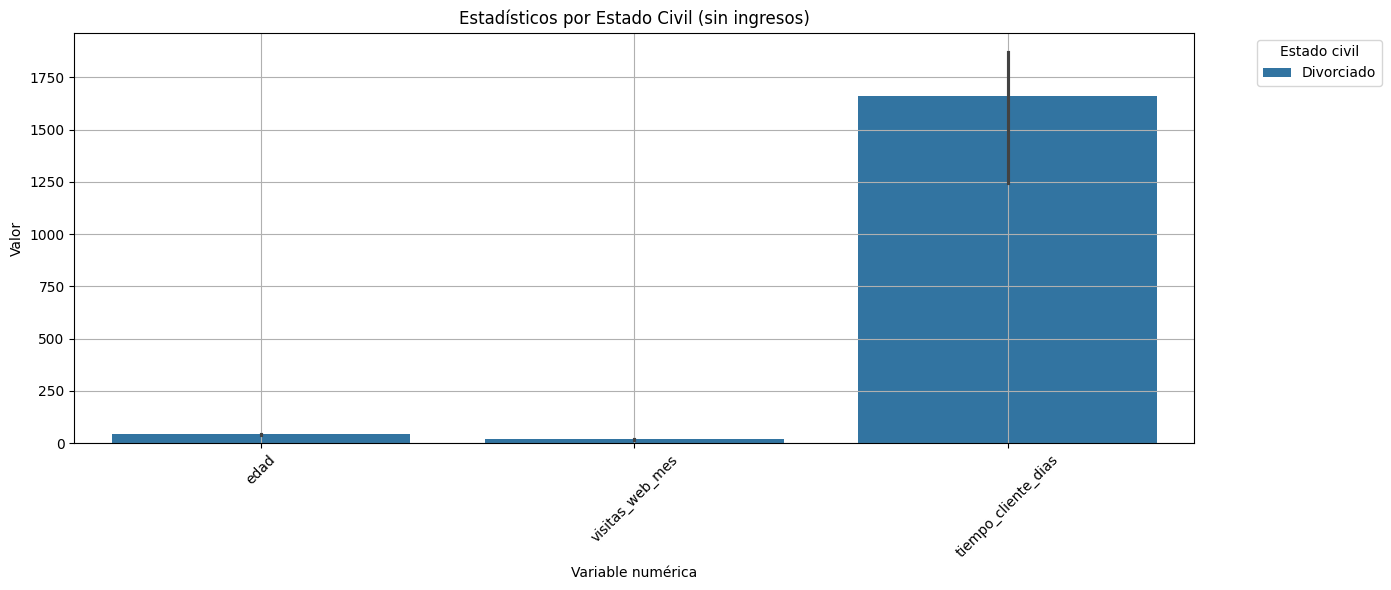

In [30]:
# Otra vez, excluimos 'ingresos'
df_plot = df_estadisticas_estado[df_estadisticas_estado['Variable'] != 'ingresos']

# Reorganizar a formato largo
df_long = df_plot.melt(id_vars=['Variable', 'Estado civil'],
                       value_vars=['Media', 'Mediana', 'Moda'],
                       var_name='Estadístico',
                       value_name='Valor')

# Gráfico de barras agrupado
plt.figure(figsize=(14, 6))
sns.barplot(data=df_long, x='Variable', y='Valor', hue='Estado civil')
plt.title("Estadísticos por Estado Civil (sin ingresos)")
plt.xlabel("Variable numérica")
plt.ylabel("Valor")
plt.xticks(rotation=45)
plt.legend(title='Estado civil', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


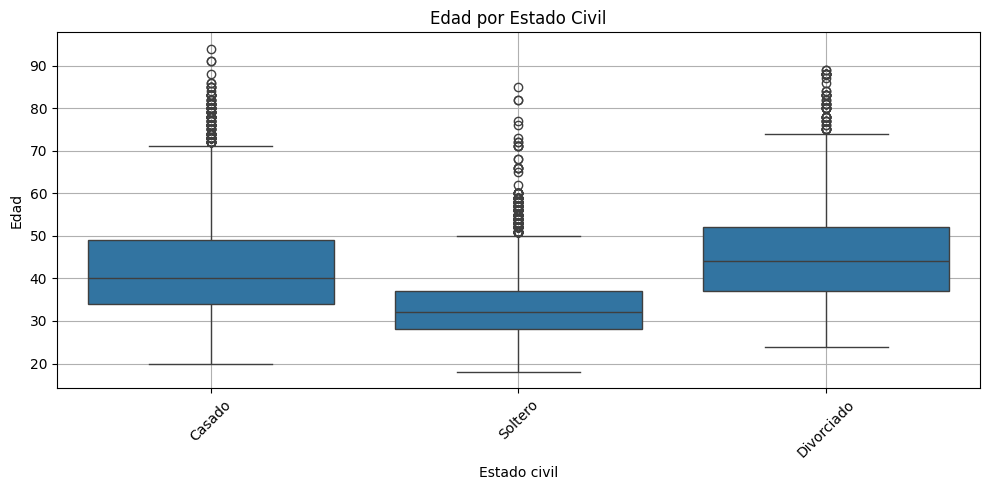

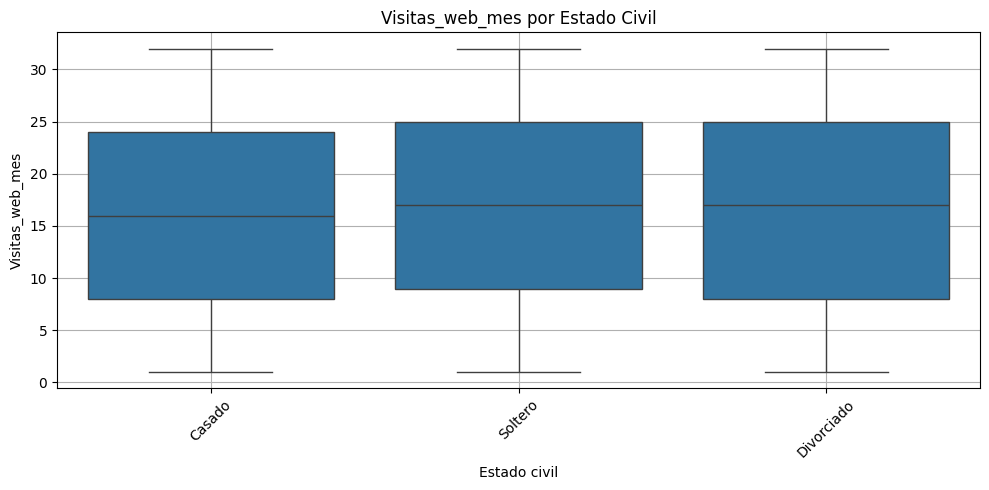

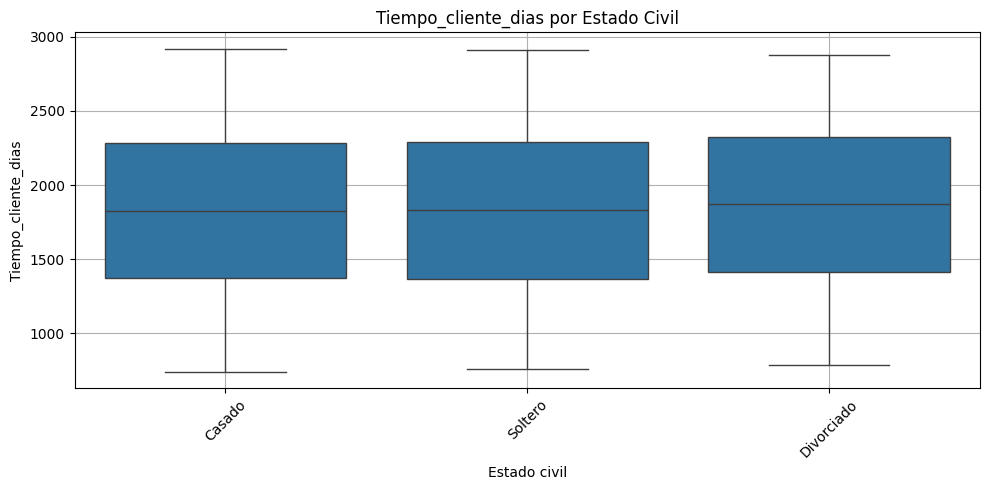

In [31]:
# Vamos a verlo con diagramas de caja!

# Variables a analizar (fácilmente modificable si varía el foco de nuestro análisis en el futuro)
variables = ['edad', 'visitas_web_mes', 'tiempo_cliente_dias']  # puedes incluir 'ingresos' si lo deseas

# Asegurarse de que no haya nulos en estado_civil
df_box = df.dropna(subset=['estado_civil'])

# Generar un boxplot por variable
for var in variables:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df_box, x='estado_civil', y=var)
    plt.title(f"{var.capitalize()} por Estado Civil")
    plt.xlabel("Estado civil")
    plt.ylabel(var.capitalize())
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [32]:
# Antes lo hemos excluido por la diferencia en las cuantías, ahora nos centramos en la diferencia de ingresos en función de las características

In [33]:
def graficar_diferencias_ingresos(diferencias_df, titulo):
    # Extraer solo fila de 'ingresos' y formatear
    df_ing = diferencias_df.loc[['ingresos']].reset_index().melt(
        id_vars='Variable',
        value_vars=['Diferencia Media', 'Diferencia Mediana', 'Diferencia Moda'],
        var_name='Estadístico',
        value_name='Diferencia'
    )

    # Gráfico de barras horizontal
    plt.figure(figsize=(8, 4))
    ax = sns.barplot(data=df_ing, x='Diferencia', y='Estadístico', palette='pastel')
    
    # Añadir etiquetas
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", padding=3, fontsize=9)

    plt.title(titulo)
    plt.axvline(0, color='black', linestyle='--')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

In [34]:
# ¿Será importante filtrar en función de las veces que visitan la web los individuos?

# Asegurarse de que no haya nulos en visitas_web_mes
df_1000_visitas = df.sort_values(by='visitas_web_mes', ascending=False).dropna(subset=['visitas_web_mes']).head(1000).copy()


In [35]:
# Asegurarse de que no haya nulos en visitas_web_mes
df_1000_visitas = df.sort_values(by='visitas_web_mes', ascending=False).dropna(subset=['visitas_web_mes']).head(1000).copy()

# Añadir etiquetas
df['grupo'] = 'Todos los clientes'
df_1000_visitas['grupo'] = 'Top 1000 visitas web'

# Unir DataFrames
df_comparado_visitas = pd.concat([df, df_1000_visitas], ignore_index=True)

# Variables a comparar
variables = ['edad', 'ingresos', 'visitas_web_mes', 'tiempo_cliente_dias']

# Calcular estadísticas
estadisticas_visitas = []
for var in variables:
    for grupo, datos in df_comparado_visitas.groupby('grupo'):
        media = datos[var].mean()
        mediana = datos[var].median()
        moda = datos[var].mode().iloc[0] if not datos[var].mode().empty else None
        estadisticas_visitas.append({
            'Variable': var,
            'Grupo': grupo,
            'Media': media,
            'Mediana': mediana,
            'Moda': moda
        })

df_estadisticas_visitas = pd.DataFrame(estadisticas_visitas)


In [36]:
# Separar
df_total = df_estadisticas_visitas[df_estadisticas_visitas['Grupo'] == 'Todos los clientes'].set_index('Variable')
df_top_visitas = df_estadisticas_visitas[df_estadisticas_visitas['Grupo'] == 'Top 1000 visitas web'].set_index('Variable')

# Diferencias
df_diferencias_visitas = df_top_visitas[['Media', 'Mediana', 'Moda']] - df_total[['Media', 'Mediana', 'Moda']]
df_diferencias_visitas.columns = ['Diferencia Media', 'Diferencia Mediana', 'Diferencia Moda']


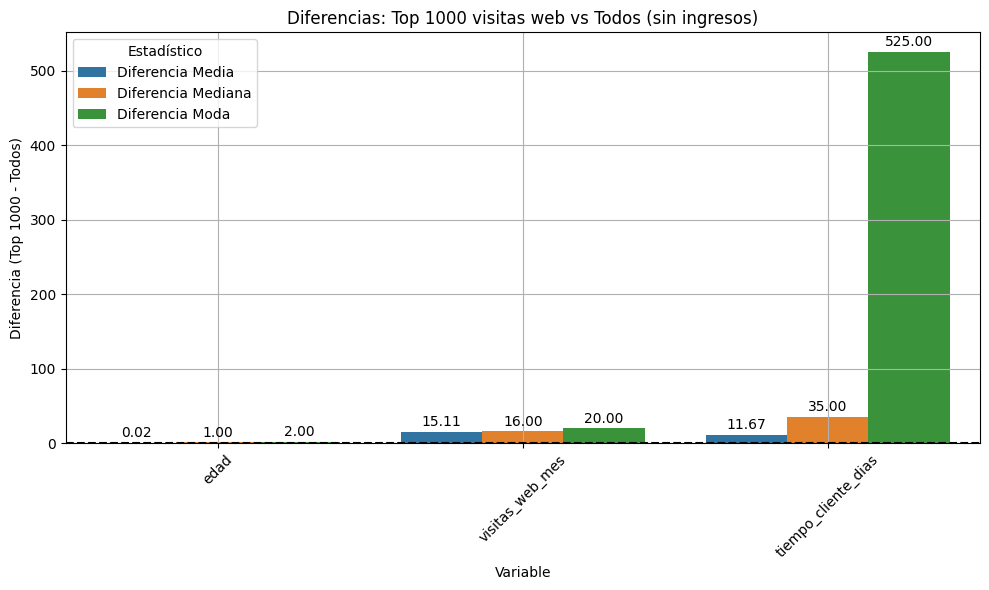

In [37]:
# Preparar para graficar
df_plot = df_diferencias_visitas.drop(index='ingresos').reset_index().melt(
    id_vars='Variable',
    value_vars=['Diferencia Media', 'Diferencia Mediana', 'Diferencia Moda'],
    var_name='Estadístico',
    value_name='Diferencia'
)

# Gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_plot, x='Variable', y='Diferencia', hue='Estadístico')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=2)

plt.title("Diferencias: Top 1000 visitas web vs Todos (sin ingresos)")
plt.axhline(0, color='black', linestyle='--')
plt.ylabel("Diferencia (Top 1000 - Todos)")
plt.xlabel("Variable")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\david\AppData\Local\Temp\ipykernel_28668\4003749283.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_ing, x='Diferencia', y='Estadístico', palette='pastel')


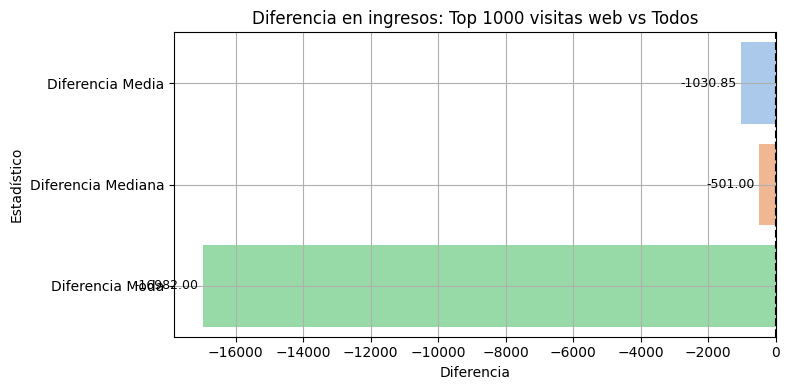

In [38]:
graficar_diferencias_ingresos(df_diferencias_visitas, "Diferencia en ingresos: Top 1000 visitas web vs Todos")

C:\Users\david\AppData\Local\Temp\ipykernel_28668\4003749283.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_ing, x='Diferencia', y='Estadístico', palette='pastel')


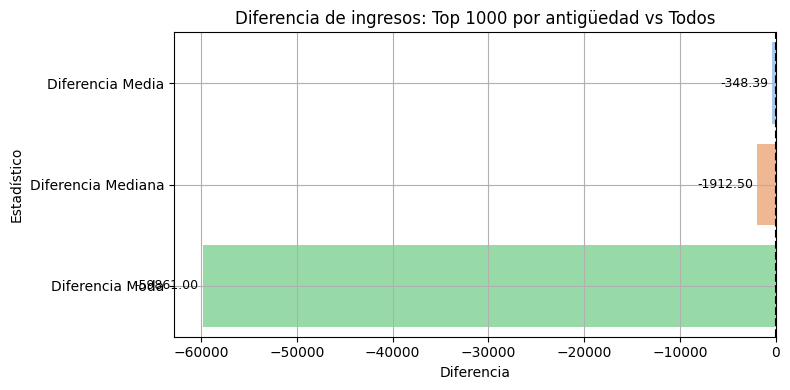

C:\Users\david\AppData\Local\Temp\ipykernel_28668\4003749283.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_ing, x='Diferencia', y='Estadístico', palette='pastel')


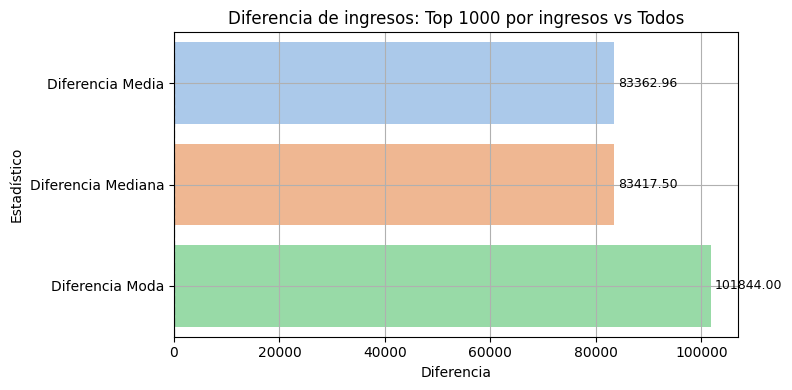

C:\Users\david\AppData\Local\Temp\ipykernel_28668\4003749283.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_ing, x='Diferencia', y='Estadístico', palette='pastel')


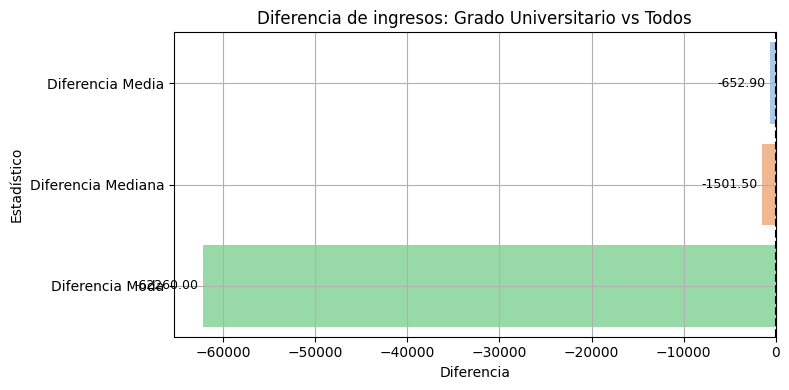

C:\Users\david\AppData\Local\Temp\ipykernel_28668\4003749283.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_ing, x='Diferencia', y='Estadístico', palette='pastel')


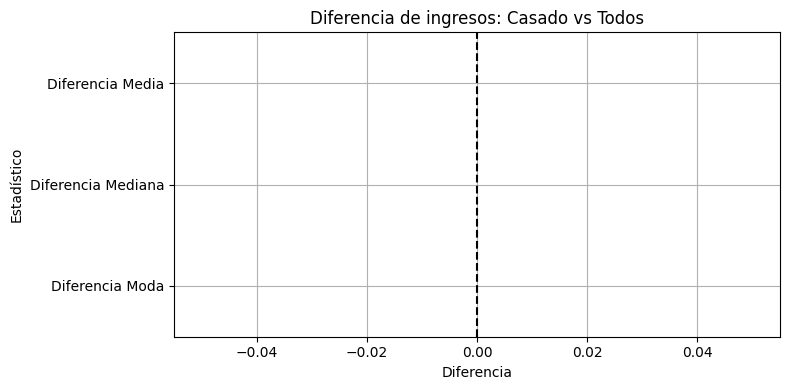

In [39]:
graficar_diferencias_ingresos(df_diferencias, "Diferencia de ingresos: Top 1000 por antigüedad vs Todos")
graficar_diferencias_ingresos(df_diferencias_ingresos, "Diferencia de ingresos: Top 1000 por ingresos vs Todos")
graficar_diferencias_ingresos(df_diferencias_educacion, "Diferencia de ingresos: Grado Universitario vs Todos")
graficar_diferencias_ingresos(df_diferencias_estado, "Diferencia de ingresos: Casado vs Todos")

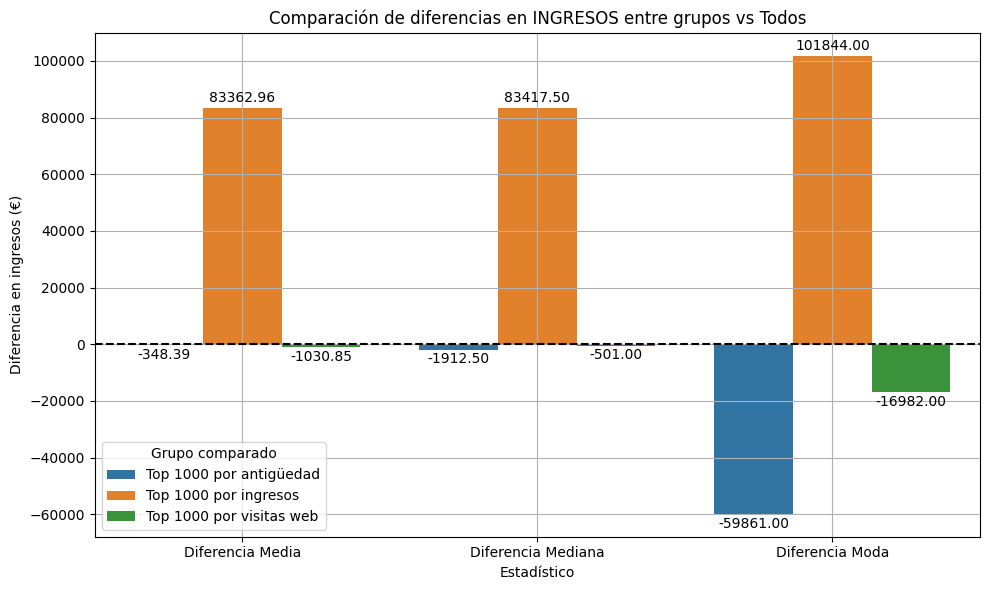

In [40]:
# Extraer y preparar diferencias solo para 'ingresos'
def preparar_datos_ingresos(dif_df, titulo):
    df_ing = dif_df.loc[['ingresos']].reset_index().melt(
        id_vars='Variable',
        value_vars=['Diferencia Media', 'Diferencia Mediana', 'Diferencia Moda'],
        var_name='Estadístico',
        value_name='Diferencia'
    )
    df_ing['Grupo'] = titulo
    return df_ing

# Preparar los tres DataFrames
df1 = preparar_datos_ingresos(df_diferencias, "Top 1000 por antigüedad")
df2 = preparar_datos_ingresos(df_diferencias_ingresos, "Top 1000 por ingresos")
df3 = preparar_datos_ingresos(df_diferencias_visitas, "Top 1000 por visitas web")

# Unir todo
df_comparativo = pd.concat([df1, df2, df3], ignore_index=True)

# Gráfico comparativo
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_comparativo, x='Estadístico', y='Diferencia', hue='Grupo')

# Etiquetas numéricas
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=2)

plt.title("Comparación de diferencias en INGRESOS entre grupos vs Todos")
plt.axhline(0, color='black', linestyle='--')
plt.ylabel("Diferencia en ingresos (€)")
plt.xlabel("Estadístico")
plt.legend(title='Grupo comparado')
plt.tight_layout()
plt.grid(True)
plt.show()


In [41]:
# Vamos a crear un datafame para ver cómo se relacionan estas variables entre sí:
# "tiene_hipoteca", "tiene_prestamo", "incumplimiento_pagos", "edad"

df_financiacion = df[['tiene_hipoteca', 'tiene_prestamo', 'incumplimiento_pagos', 'edad']].copy()
df_financiacion.head()


,tiene_hipoteca,tiene_prestamo,incumplimiento_pagos,edad
id,,,,
089b39d8-e4d0-461b-87d4-814d71e0e079,0,0,0,<NA>
e9d37224-cb6f-4942-98d7-46672963d097,0,0,<NA>,57
3f9f49b5-e410-4948-bf6e-f9244f04918b,1,0,0,37
9991fafb-4447-451a-8be2-b0df6098d13e,0,0,0,40
eca60b76-70b6-4077-80ba-bc52e8ebb0eb,0,1,0,56


In [42]:
# Edad media cuando las dummies son 1
# Asegurarse de que no haya valores nulos en las columnas relevantes
df_filtrado = df_financiacion.dropna(subset=['tiene_hipoteca', 'tiene_prestamo', 'incumplimiento_pagos', 'edad'])

# Calcular edad media según condiciones
edad_hipoteca = df_filtrado[df_filtrado['tiene_hipoteca'] == 1]['edad'].mean()
edad_prestamo = df_filtrado[df_filtrado['tiene_prestamo'] == 1]['edad'].mean()
edad_incumplimiento = df_filtrado[df_filtrado['incumplimiento_pagos'] == 1]['edad'].mean()

# Mostrar resultados
print(f"Edad media con hipoteca: {edad_hipoteca:.1f} años")
print(f"Edad media con préstamo: {edad_prestamo:.1f} años")
print(f"Edad media con incumplimiento de pagos: {edad_incumplimiento:.1f} años")


Edad media con hipoteca: 39.0 años
Edad media con préstamo: 38.8 años
Edad media con incumplimiento de pagos: 48.0 años


In [43]:
# istribución de edad por tramos y varibales

# Definir los grupos de edad (puedes ajustar los rangos si lo deseas)
bins = [0, 18, 24, 34, 44, 54, 64, 74, 120]
labels = ['0-18', '19-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']

# Eliminar nulos de edad y aplicar bins
df_edad = df_financiacion.dropna(subset=['edad']).copy()
df_edad['grupo_edad'] = pd.cut(df_edad['edad'], bins=bins, labels=labels, right=True)

# Agrupación y conteo
df_financiacion_gruposEdad = df_edad.groupby('grupo_edad')[['tiene_hipoteca', 'tiene_prestamo', 'incumplimiento_pagos']].sum().astype(int)

# Calcular totales y añadir como nueva fila
totales = pd.DataFrame(df_financiacion_gruposEdad.sum()).T
totales.index = ['TOTAL']


# Añadir al DataFrame
df_financiacion_gruposEdad = pd.concat([df_financiacion_gruposEdad, totales])

df_financiacion_gruposEdad


C:\Users\david\AppData\Local\Temp\ipykernel_28668\801588167.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_financiacion_gruposEdad = df_edad.groupby('grupo_edad')[['tiene_hipoteca', 'tiene_prestamo', 'incumplimiento_pagos']].sum().astype(int)


,tiene_hipoteca,tiene_prestamo,incumplimiento_pagos
0-18,8,3,0
19-24,405,112,0
25-34,5380,1621,0
35-44,5209,1487,0
45-54,3277,988,2
55-64,1301,368,0
65-74,143,36,0
75+,76,24,0
TOTAL,15799,4639,2


In [44]:
# Relacionar entre las dummies

# Seleccionar columnas relevantes
df_rel = df[['tiene_hipoteca', 'tiene_prestamo', 'incumplimiento_pagos']].dropna()

# Convertir a int (si son float)
df_rel = df_rel.astype(int)

# Función auxiliar para calcular P(B=1 | A=1)
def probabilidad_condicional(df, condicion, objetivo):
    subset = df[df[condicion] == 1]
    prob = subset[objetivo].mean()
    return prob


In [45]:
# Evaluar relaciones entre columnas

# HIPOTECA => préstamo / incumplimiento
p_prestamo_dado_hipoteca = probabilidad_condicional(df_rel, 'tiene_hipoteca', 'tiene_prestamo')
p_incumplimiento_dado_hipoteca = probabilidad_condicional(df_rel, 'tiene_hipoteca', 'incumplimiento_pagos')

# PRÉSTAMO => hipoteca / incumplimiento
p_hipoteca_dado_prestamo = probabilidad_condicional(df_rel, 'tiene_prestamo', 'tiene_hipoteca')
p_incumplimiento_dado_prestamo = probabilidad_condicional(df_rel, 'tiene_prestamo', 'incumplimiento_pagos')

# INCUMPLIMIENTO => hipoteca / préstamo
p_hipoteca_dado_incumplimiento = probabilidad_condicional(df_rel, 'incumplimiento_pagos', 'tiene_hipoteca')
p_prestamo_dado_incumplimiento = probabilidad_condicional(df_rel, 'incumplimiento_pagos', 'tiene_prestamo')


In [46]:
# Visualización de resultados

print("Probabilidades condicionales:")

print(f"- P(tiene_prestamo=1 | tiene_hipoteca=1):       {p_prestamo_dado_hipoteca:.2%}")
print(f"- P(incumplimiento_pagos=1 | tiene_hipoteca=1): {p_incumplimiento_dado_hipoteca:.2%}")

print(f"- P(tiene_hipoteca=1 | tiene_prestamo=1):       {p_hipoteca_dado_prestamo:.2%}")
print(f"- P(incumplimiento_pagos=1 | tiene_prestamo=1): {p_incumplimiento_dado_prestamo:.2%}")

print(f"- P(tiene_hipoteca=1 | incumplimiento_pagos=1): {p_hipoteca_dado_incumplimiento:.2%}")
print(f"- P(tiene_prestamo=1 | incumplimiento_pagos=1): {p_prestamo_dado_incumplimiento:.2%}")


Probabilidades condicionales:
- P(tiene_prestamo=1 | tiene_hipoteca=1):       17.09%
- P(incumplimiento_pagos=1 | tiene_hipoteca=1): 0.01%
- P(tiene_hipoteca=1 | tiene_prestamo=1):       58.35%
- P(incumplimiento_pagos=1 | tiene_prestamo=1): 0.00%
- P(tiene_hipoteca=1 | incumplimiento_pagos=1): 50.00%
- P(tiene_prestamo=1 | incumplimiento_pagos=1): 0.00%


In [47]:
# Crear el DataFrame como antes
df_probabilidades = pd.DataFrame([
    {'Condición': 'tiene_hipoteca = 1', 'Objetivo': 'tiene_prestamo = 1', 'Probabilidad': p_prestamo_dado_hipoteca},
    {'Condición': 'tiene_hipoteca = 1', 'Objetivo': 'incumplimiento_pagos = 1', 'Probabilidad': p_incumplimiento_dado_hipoteca},
    {'Condición': 'tiene_prestamo = 1', 'Objetivo': 'tiene_hipoteca = 1', 'Probabilidad': p_hipoteca_dado_prestamo},
    {'Condición': 'tiene_prestamo = 1', 'Objetivo': 'incumplimiento_pagos = 1', 'Probabilidad': p_incumplimiento_dado_prestamo},
    {'Condición': 'incumplimiento_pagos = 1', 'Objetivo': 'tiene_hipoteca = 1', 'Probabilidad': p_hipoteca_dado_incumplimiento},
    {'Condición': 'incumplimiento_pagos = 1', 'Objetivo': 'tiene_prestamo = 1', 'Probabilidad': p_prestamo_dado_incumplimiento}
])

# Convertir la columna de probabilidad a porcentaje (numérico)
df_probabilidades['Probabilidad'] = (df_probabilidades['Probabilidad'] * 100).round(1).astype(str) + '%'

# Asignar nombres personalizados al índice
df_probabilidades.index = [
    "P(Préstamo si tiene hipoteca)",
    "P(Impagos si tiene hipoteca)",
    "P(Hipoteca si tiene préstamos)",
    "P(Impagos si tiene préstamos)",
    "P(Hipoteca si tiene impagos)",
    "P(Préstamos si tiene impagos)"
]

df_probabilidades


,Condición,Objetivo,Probabilidad
P(Préstamo si tiene hipoteca),tiene_hipoteca = 1,tiene_prestamo = 1,17.1%
P(Impagos si tiene hipoteca),tiene_hipoteca = 1,incumplimiento_pagos = 1,0.0%
P(Hipoteca si tiene préstamos),tiene_prestamo = 1,tiene_hipoteca = 1,58.3%
P(Impagos si tiene préstamos),tiene_prestamo = 1,incumplimiento_pagos = 1,0.0%
P(Hipoteca si tiene impagos),incumplimiento_pagos = 1,tiene_hipoteca = 1,50.0%
P(Préstamos si tiene impagos),incumplimiento_pagos = 1,tiene_prestamo = 1,0.0%


In [48]:
# Vamos a crear un datafame para ver cómo se relacionan estas variables entre sí:
# "edad", "total_hijos", "hijos_pequeños", "hijos_adolescentes", "nivel_educativo"

In [49]:
# Crear DataFrame filtrado
df_familia = df[['edad', 'total_hijos', 'hijos_pequeños', 'hijos_adolescentes', 'nivel_educativo']].copy()
df_familia.columns = ['edad', 'total_hijos', 'hijos_pequeños', 'hijos_adolescentes', 'nivel_educativo']

# Mostrar los primeros registros para confirmar
df_familia.head()

,edad,total_hijos,hijos_pequeños,hijos_adolescentes,nivel_educativo
id,,,,,
089b39d8-e4d0-461b-87d4-814d71e0e079,<NA>,1,1,0,Primaria
e9d37224-cb6f-4942-98d7-46672963d097,57,2,1,1,Instituto
3f9f49b5-e410-4948-bf6e-f9244f04918b,37,2,1,1,Instituto
9991fafb-4447-451a-8be2-b0df6098d13e,40,3,1,2,Primaria
eca60b76-70b6-4077-80ba-bc52e8ebb0eb,56,3,1,2,Instituto


In [50]:
# Promedio de hijos por nivel educativo

df_familia.groupby('nivel_educativo')[['total_hijos', 'hijos_pequeños', 'hijos_adolescentes']].mean().round(2)

,total_hijos,hijos_pequeños,hijos_adolescentes
nivel_educativo,,,
Formación profesional,2.02,1.02,1.0
Grado Universitario,2.01,1.01,1.0
Instituto,2.01,1.01,1.0
Primaria,2.0,1.0,1.0


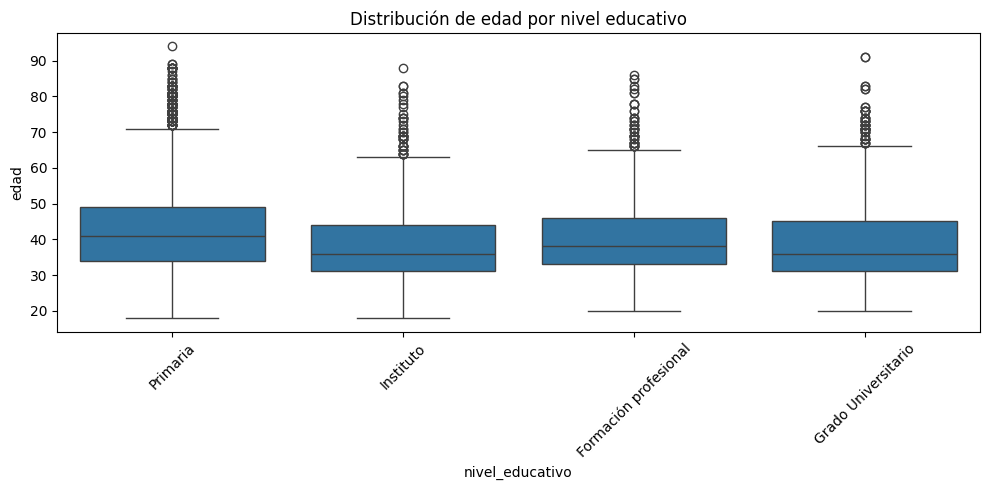

In [51]:
# Distribución de edad por nivel educativo

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_familia, x='nivel_educativo', y='edad')
plt.title("Distribución de edad por nivel educativo")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [52]:
# Proporción de personas con hijos en función de su edad

# Crear tramos de edad
bins = [0, 24, 34, 44, 54, 64, 120]
labels = ['0-24', '25-34', '35-44', '45-54', '55-64', '65+']
df_familia['grupo_edad'] = pd.cut(df_familia['edad'], bins=bins, labels=labels)

# Calcular proporción de personas con al menos un hijo
df_familia['tiene_hijos'] = df_familia['total_hijos'] > 0
proporcion = df_familia.groupby('grupo_edad')['tiene_hijos'].mean().round(2)

C:\Users\david\AppData\Local\Temp\ipykernel_28668\1191677084.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporcion = df_familia.groupby('grupo_edad')['tiene_hijos'].mean().round(2)


In [53]:
# Para mayor comodidad, covertimos "proporcion" en un DatFrame

# Convertir la Series 'proporcion' en un DataFrame
df_proporcion_hijos = proporcion.reset_index()

# Renombrar columna para mayor claridad
df_proporcion_hijos.columns = ['grupo_edad', 'proporcion_con_hijos']

# Convertir a porcentaje si lo deseas
df_proporcion_hijos['proporcion_con_hijos'] = (df_proporcion_hijos['proporcion_con_hijos'] * 100).round(1)

df_proporcion_hijos


,grupo_edad,proporcion_con_hijos
0,0-24,91.0
1,25-34,89.0
2,35-44,88.0
3,45-54,90.0
4,55-64,87.0
5,65+,<NA>


In [54]:
# Ahora, con nuevos grupos de edad

# Definir nuevos tramos de edad
bins = [18, 34, 54, 120]
labels = ['18-34', '35-54', '55+']

# Aplicar agrupación por edad
df_familia['grupo_edad'] = pd.cut(df_familia['edad'], bins=bins, labels=labels)

# Calcular si tiene al menos un hijo
df_familia['tiene_hijos'] = df_familia['total_hijos'] > 0

# Calcular proporción por grupo de edad
proporcion = df_familia.groupby('grupo_edad')['tiene_hijos'].mean().round(3)

# Convertir a DataFrame y pasar a porcentaje
df_proporcion_hijos = proporcion.reset_index()
df_proporcion_hijos.columns = ['grupo_edad', 'proporcion_con_hijos']
df_proporcion_hijos['proporcion_con_hijos'] = (df_proporcion_hijos['proporcion_con_hijos'] * 100).round(1)

# Renombrar valores de grupo_edad
df_proporcion_hijos.index = [
    'Adulto joven',
    'Adulto',
    'Adulto mayor'
]
# Mostrar resultado
df_proporcion_hijos


C:\Users\david\AppData\Local\Temp\ipykernel_28668\2008622693.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proporcion = df_familia.groupby('grupo_edad')['tiene_hijos'].mean().round(3)


,grupo_edad,proporcion_con_hijos
Adulto joven,18-34,89.2
Adulto,35-54,88.9
Adulto mayor,55+,87.2


In [55]:
# Incluimos los hijos pequeños y adolescentes en la visualización del dato

# Asegurarse de tener los tramos correctos
bins = [18, 34, 54, 120]
labels = ['18-34', '35-54', '55+']
df_familia['grupo_edad'] = pd.cut(df_familia['edad'], bins=bins, labels=labels)

# Crear columnas binarias
df_familia['tiene_hijos'] = df_familia['total_hijos'] > 0
df_familia['tiene_hijos_pequeños'] = df_familia['hijos_pequeños'] > 0
df_familia['tiene_hijos_adolescentes'] = df_familia['hijos_adolescentes'] > 0

# Agrupar y calcular proporciones
agrupado = df_familia.groupby('grupo_edad')[['tiene_hijos', 'tiene_hijos_pequeños', 'tiene_hijos_adolescentes']].mean().round(3)

# Convertir a porcentaje
agrupado = (agrupado * 100).round(1)

# Renombrar columnas
agrupado.columns = ['proporcion_con_hijos', 'proporcion_con_hijos_pequeños', 'proporcion_con_hijos_adolescentes']

# Guardar como df_proporcion_hijos actualizado
df_proporcion_hijos = agrupado

df_proporcion_hijos


C:\Users\david\AppData\Local\Temp\ipykernel_28668\166416671.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agrupado = df_familia.groupby('grupo_edad')[['tiene_hijos', 'tiene_hijos_pequeños', 'tiene_hijos_adolescentes']].mean().round(3)


,proporcion_con_hijos,proporcion_con_hijos_pequeños,proporcion_con_hijos_adolescentes
grupo_edad,,,
18-34,89.2,67.3,67.5
35-54,88.9,66.8,66.9
55+,87.2,67.4,64.0


In [56]:
# Vamos a unir los dataframes de df_financiacion y df_familia

df_completo = df[['total_hijos', 'hijos_pequeños', 'hijos_adolescentes',
                    'nivel_educativo', 'tiene_hipoteca', 'tiene_prestamo',
                    'incumplimiento_pagos', 'edad']].copy()

df_completo.head()


,total_hijos,hijos_pequeños,hijos_adolescentes,nivel_educativo,tiene_hipoteca,tiene_prestamo,incumplimiento_pagos,edad
id,,,,,,,,
089b39d8-e4d0-461b-87d4-814d71e0e079,1,1,0,Primaria,0,0,0,<NA>
e9d37224-cb6f-4942-98d7-46672963d097,2,1,1,Instituto,0,0,<NA>,57
3f9f49b5-e410-4948-bf6e-f9244f04918b,2,1,1,Instituto,1,0,0,37
9991fafb-4447-451a-8be2-b0df6098d13e,3,1,2,Primaria,0,0,0,40
eca60b76-70b6-4077-80ba-bc52e8ebb0eb,3,1,2,Instituto,0,1,0,56


In [57]:
# Vamos a ver como afecta tener hijos al resto de variables:

# Primero, hacemos que la variable sea binaria y sea True cuando es mayor que cero

df_completo['tiene_hijos'] = df_completo['total_hijos'] > 0
df_completo.head()

,total_hijos,hijos_pequeños,hijos_adolescentes,nivel_educativo,tiene_hipoteca,tiene_prestamo,incumplimiento_pagos,edad,tiene_hijos
id,,,,,,,,,
089b39d8-e4d0-461b-87d4-814d71e0e079,1,1,0,Primaria,0,0,0,<NA>,True
e9d37224-cb6f-4942-98d7-46672963d097,2,1,1,Instituto,0,0,<NA>,57,True
3f9f49b5-e410-4948-bf6e-f9244f04918b,2,1,1,Instituto,1,0,0,37,True
9991fafb-4447-451a-8be2-b0df6098d13e,3,1,2,Primaria,0,0,0,40,True
eca60b76-70b6-4077-80ba-bc52e8ebb0eb,3,1,2,Instituto,0,1,0,56,True


In [58]:
# Normalizamos el dataframe

# Asegurar valores binarios (convertir True/False a 0/1)
df_cond = df_completo[['tiene_hijos', 'tiene_hipoteca', 'tiene_prestamo', 'incumplimiento_pagos']].dropna().astype(int)

# Añadir variable binaria para nivel universitario
df_cond['nivel_educativo_universitario'] = df_completo['nivel_educativo'].fillna('').apply(
    lambda x: 1 if 'Grado Universitario' in x else 0
)

In [59]:
# Función auxiliar
def prob_condicional(df, condicion, objetivo):
    # Asegura que no esté vacío y devuelve float o np.nan
    subset = df[df[condicion] == 1]
    if len(subset) == 0:
        return float('nan')
    return round(subset[objetivo].mean(), 3)

# P(variable = 1 | tiene_hijos = 1)
p_edu_dado_hijos = prob_condicional(df_cond, 'tiene_hijos', 'nivel_educativo_universitario')
p_hipoteca_dado_hijos = prob_condicional(df_cond, 'tiene_hijos', 'tiene_hipoteca')
p_prestamo_dado_hijos = prob_condicional(df_cond, 'tiene_hijos', 'tiene_prestamo')
p_impago_dado_hijos = prob_condicional(df_cond, 'tiene_hijos', 'incumplimiento_pagos')

# P(tiene_hijos = 1 | variable = 1)
p_hijos_dado_edu = prob_condicional(df_cond, 'nivel_educativo_universitario', 'tiene_hijos')
p_hijos_dado_hipoteca = prob_condicional(df_cond, 'tiene_hipoteca', 'tiene_hijos')
p_hijos_dado_prestamo = prob_condicional(df_cond, 'tiene_prestamo', 'tiene_hijos')
p_hijos_dado_impago = prob_condicional(df_cond, 'incumplimiento_pagos', 'tiene_hijos')


In [60]:
# Crear el DataFrame
df_prob_hijos = pd.DataFrame([
    {'Condición': 'tiene_hijos = 1', 'Objetivo': 'nivel_educativo_universitario = 1', 'Probabilidad': p_edu_dado_hijos},
    {'Condición': 'tiene_hijos = 1', 'Objetivo': 'tiene_hipoteca = 1', 'Probabilidad': p_hipoteca_dado_hijos},
    {'Condición': 'tiene_hijos = 1', 'Objetivo': 'tiene_prestamo = 1', 'Probabilidad': p_prestamo_dado_hijos},
    {'Condición': 'tiene_hijos = 1', 'Objetivo': 'incumplimiento_pagos = 1', 'Probabilidad': p_impago_dado_hijos},

    {'Condición': 'nivel_educativo_universitario = 1', 'Objetivo': 'tiene_hijos = 1', 'Probabilidad': p_hijos_dado_edu},
    {'Condición': 'tiene_hipoteca = 1', 'Objetivo': 'tiene_hijos = 1', 'Probabilidad': p_hijos_dado_hipoteca},
    {'Condición': 'tiene_prestamo = 1', 'Objetivo': 'tiene_hijos = 1', 'Probabilidad': p_hijos_dado_prestamo},
    {'Condición': 'incumplimiento_pagos = 1', 'Objetivo': 'tiene_hijos = 1', 'Probabilidad': p_hijos_dado_impago}
])

# Asegurar que son numéricos
df_prob_hijos['Probabilidad'] = pd.to_numeric(df_prob_hijos['Probabilidad'], errors='coerce')

# Convertir a porcentaje como string con símbolo
df_prob_hijos['Probabilidad'] = (df_prob_hijos['Probabilidad'] * 100).round(1).astype(str) + '%'

# Ver resultado
df_prob_hijos


,Condición,Objetivo,Probabilidad
0,tiene_hijos = 1,nivel_educativo_universitario = 1,26.8%
1,tiene_hijos = 1,tiene_hipoteca = 1,48.9%
2,tiene_hijos = 1,tiene_prestamo = 1,15.6%
3,tiene_hijos = 1,incumplimiento_pagos = 1,0.0%
4,nivel_educativo_universitario = 1,tiene_hijos = 1,88.3%
5,tiene_hipoteca = 1,tiene_hijos = 1,88.5%
6,tiene_prestamo = 1,tiene_hijos = 1,89.2%
7,incumplimiento_pagos = 1,tiene_hijos = 1,nan%


In [61]:
# Visualización

# Crear copia para graficar
df_plot = df_prob_hijos.copy()

# Convertir Probabilidad de string con "%" a float para graficar
df_plot['Probabilidad'] = df_plot['Probabilidad'].str.replace('%', '').astype(float)


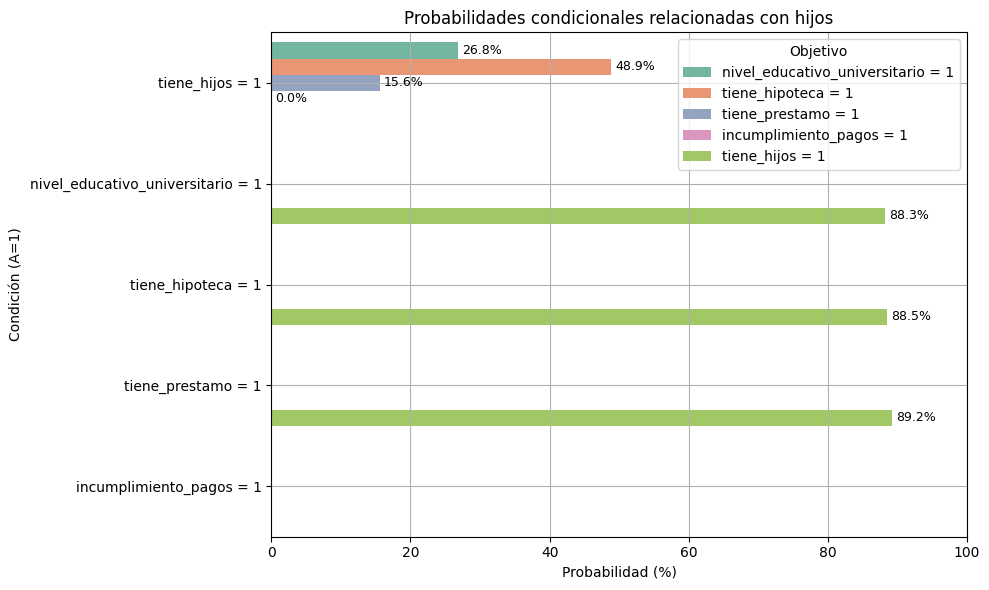

In [62]:
# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_plot, x='Probabilidad', y='Condición', hue='Objetivo', palette='Set2')

# Añadir etiquetas de valor
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=9)

plt.title("Probabilidades condicionales relacionadas con hijos")
plt.xlabel("Probabilidad (%)")
plt.ylabel("Condición (A=1)")
plt.xlim(0, 100)
plt.tight_layout()
plt.grid(True)
plt.show()


In [63]:
# Estos cálculos y este gráfico será mas útil comparándolo conn la totalidad de los casos

# Calcular proporciones generales
proporcion_universitario = df_cond['nivel_educativo_universitario'].mean()
proporcion_hipoteca = df_cond['tiene_hipoteca'].mean()
proporcion_prestamo = df_cond['tiene_prestamo'].mean()
proporcion_impago = df_cond['incumplimiento_pagos'].mean()

# Crear nuevo DataFrame con proporciones base
df_base = pd.DataFrame([
    {'Condición': 'Referencia general', 'Objetivo': 'nivel_educativo_universitario = 1', 'Probabilidad': proporcion_universitario * 100},
    {'Condición': 'Referencia general', 'Objetivo': 'tiene_hipoteca = 1', 'Probabilidad': proporcion_hipoteca * 100},
    {'Condición': 'Referencia general', 'Objetivo': 'tiene_prestamo = 1', 'Probabilidad': proporcion_prestamo * 100},
    {'Condición': 'Referencia general', 'Objetivo': 'incumplimiento_pagos = 1', 'Probabilidad':  proporcion_impago * 100},
])


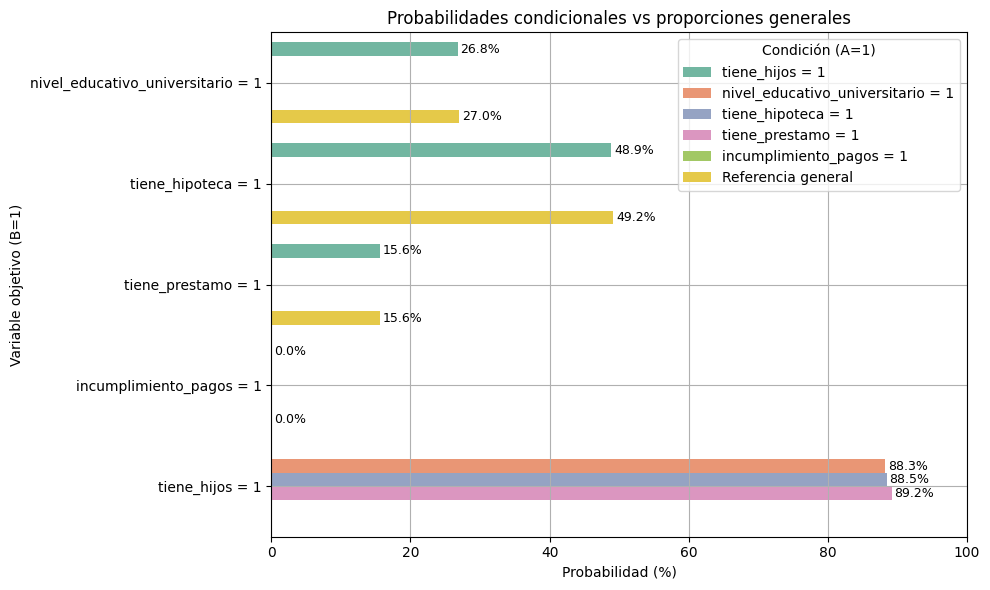

In [64]:
# Unir los DataFrames
df_plot_base = pd.concat([df_plot, df_base], ignore_index=True)

# Gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_plot_base, x='Probabilidad', y='Objetivo', hue='Condición', palette='Set2')

# Etiquetas
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=2, fontsize=9)

plt.title("Probabilidades condicionales vs proporciones generales")
plt.xlabel("Probabilidad (%)")
plt.ylabel("Variable objetivo (B=1)")
plt.xlim(0, 100)
plt.legend(title='Condición (A=1)')
plt.tight_layout()
plt.grid(True)
plt.show()


In [65]:
# Copiar el df original (que tiene '%' como string)
df_prob_hijos_base = df_prob_hijos.copy()

# Quitar el símbolo '%' y convertir a float
df_prob_hijos_base['Probabilidad_num'] = df_prob_hijos_base['Probabilidad'].str.replace('%', '').astype(float)

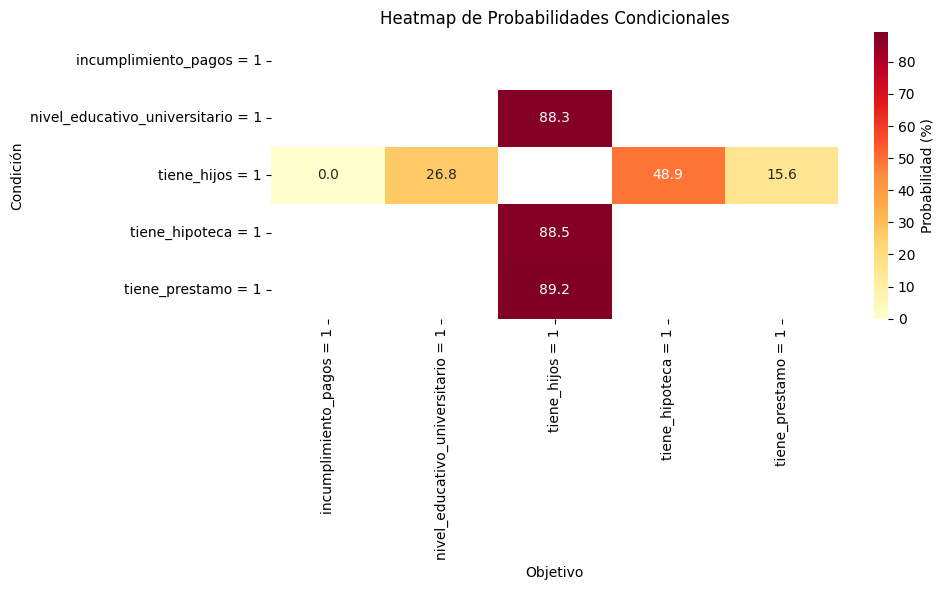

In [66]:
# Preparar tabla como matriz para heatmap
heat_df = df_prob_hijos_base.pivot(index="Condición", columns="Objetivo", values="Probabilidad_num")

plt.figure(figsize=(10, 6))
sns.heatmap(heat_df, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': 'Probabilidad (%)'})
plt.title("Heatmap de Probabilidades Condicionales")
plt.tight_layout()
plt.show()


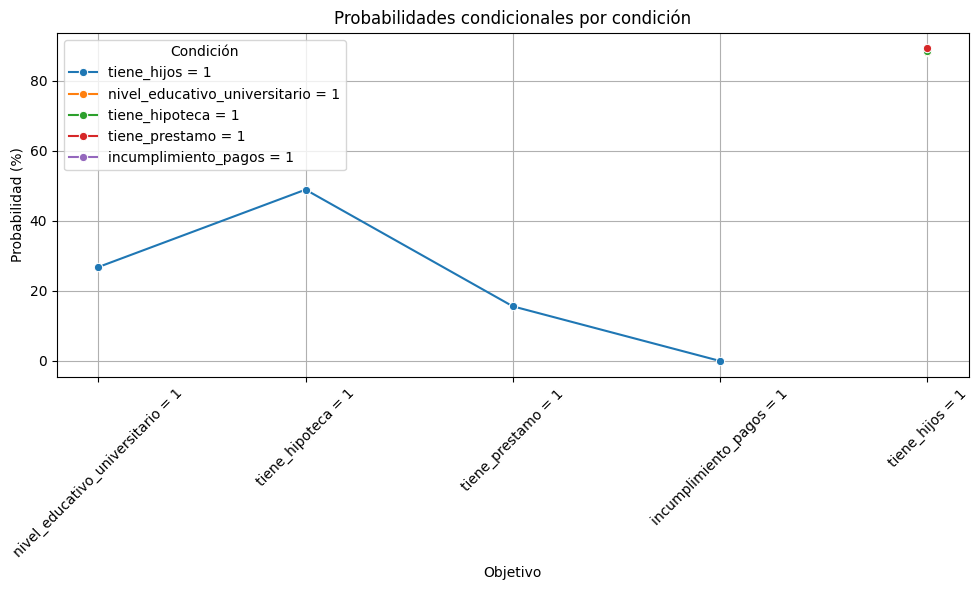

In [67]:
# Transformar para usar en lineplot
df_lineplot = df_prob_hijos_base.copy()
df_lineplot = df_lineplot[df_lineplot['Condición'] != 'Referencia general']  # opcional

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_lineplot, x='Objetivo', y='Probabilidad_num', hue='Condición', marker='o')
plt.xticks(rotation=45)
plt.ylabel("Probabilidad (%)")
plt.title("Probabilidades condicionales por condición")
plt.tight_layout()
plt.grid(True)
plt.show()


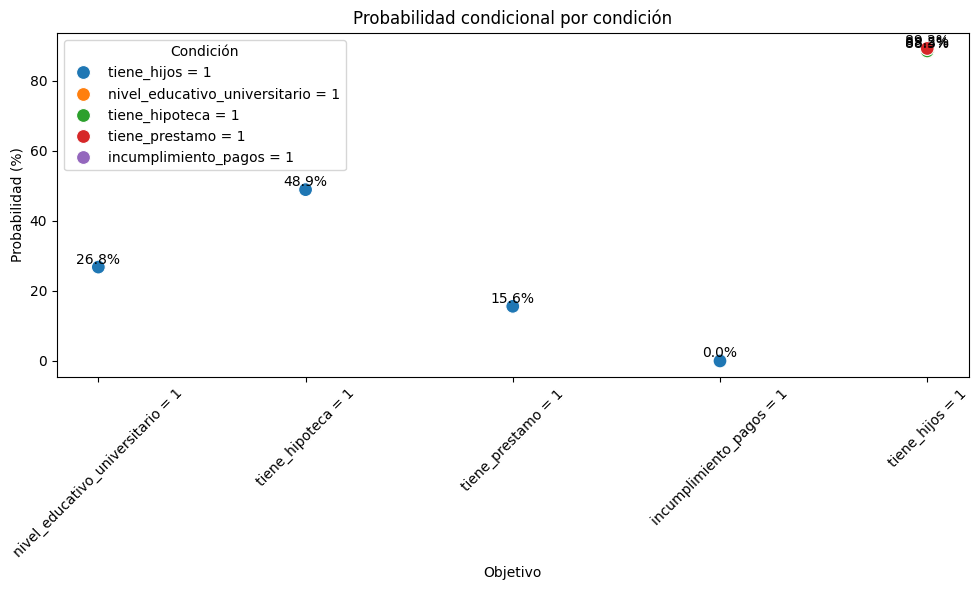

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_lineplot, x='Objetivo', y='Probabilidad_num', hue='Condición', s=100)

for i, row in df_lineplot.iterrows():
    plt.text(row['Objetivo'], row['Probabilidad_num'] + 1, f"{row['Probabilidad_num']:.1f}%", ha='center')

plt.title("Probabilidad condicional por condición")
plt.ylabel("Probabilidad (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


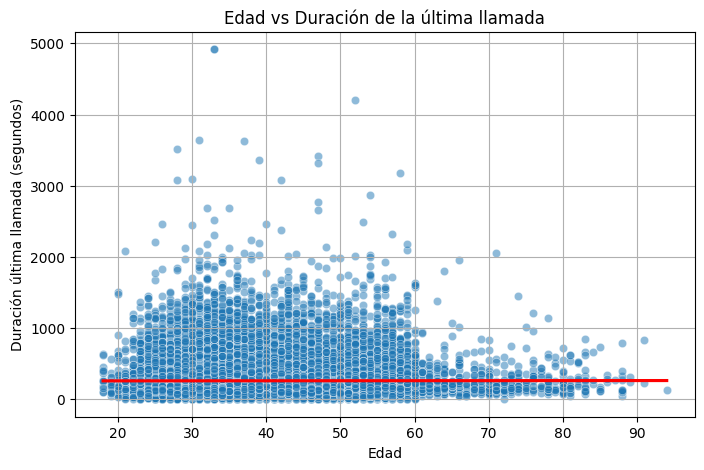

In [69]:
# EDAD Y DURACIÓN DE LLAMADAS
df1 = df[['edad', 'duracion_ultima_llamada']].dropna()

# Gráfico de dispersión + regresión
plt.figure(figsize=(8,5))
sns.scatterplot(data=df1, x='edad', y='duracion_ultima_llamada', alpha=0.5)
sns.regplot(data=df1, x='edad', y='duracion_ultima_llamada', scatter=False, color='red')
plt.title("Edad vs Duración de la última llamada")
plt.xlabel("Edad")
plt.ylabel("Duración última llamada (segundos)")
plt.grid(True)
plt.show()

# La duración de las llamadas tiende a ser más larga entre los 25 y 60 años. Esta es la edad en la que somos más activos económicamente hablando
# y cuando, en líneas generales, nos preocupamos más por obtener condiciones ventajosas bancariamente.

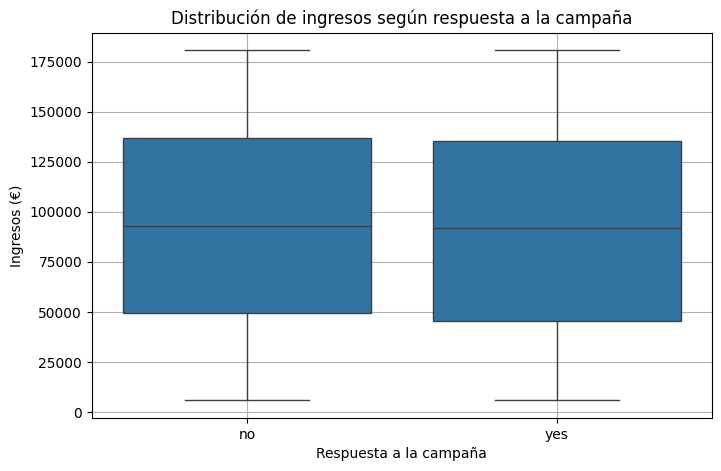

In [70]:
# DISTRIBUCIÓN DE LA RENTA Y RESPUESTA A LA CAMPAÑA
df2 = df[['ingresos','respuesta_campaña']].dropna()

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(data=df2, x='respuesta_campaña', y='ingresos')
plt.title("Distribución de ingresos según respuesta a la campaña")
plt.xlabel("Respuesta a la campaña")
plt.ylabel("Ingresos (€)")
plt.grid(True)
plt.show()

# Se ve cómo claramente que el target de la campaña está definido en parte por los ingresos percibidos, puesto que el total de observaciones positivas o negativas
# se conjura alrededor de los mismos límites superior e inferior. S